# <p style="text-align: center;"> <span style="color:#a50f15">Progetto Analisi Dati</span> </p>
## <p style="text-align: center;"><span style="color:#ef3b2c">Alessia Orfanotti </span> </p>
### <p style="text-align: center;"><span style="color:#fb6a4a">a.a. 2020-21</span> </p>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_numerico = df[['Age','SibSp','Parch','Fare']]
df_categorico = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


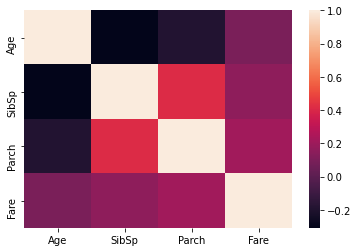

In [5]:
print(df_numerico.corr())
sns.heatmap(df_numerico.corr())
plt.show()

# <p style="text-align: center;"><span style="color:#ef3b2c"> Dati informativi </span></p> 

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## <p><span style="color:#fd8d3c"> 1. Passeggeri </span></p> 

A bordo della nave sono presenti 891 passeggeri, alcuni di essi sono accompagnati da famigliari o coniugi, mentre altri viaggiano da soli.
- 283 persone viaggiano senza fratelli/coniugi
- 213 persone viaggiano senza genitori/figli

In [10]:
soli1=[]
for c in df.SibSp:
    if c == 0:
        soli1.append (0)
    else:
        soli1.append (1) 
        
df['soli1'] = soli1

print("Passeggeri senza fratelli o coniugi: ", sum(df['soli1']))

soli2=[]
for c in df.Parch:
    if c == 0:
        soli2.append (0)
    else:
        soli2.append (1) 
        
df['soli2'] = soli2

print("Passeggeri senza figli o genitori: ", sum(df['soli2']))

Passeggeri senza fratelli o coniugi:  283
Passeggeri senza figli o genitori:  213


In [14]:
soli = (df['Parch'] == 0) & (df['SibSp'] == 0)

print("Passeggeri che viaggiano completamente soli: 537")
soli.value_counts()


Passeggeri che viaggiano completamente soli: 537


True     537
False    354
dtype: int64

## <p><span style="color:#fd8d3c"> 2. Classi </span></p> 

Sono presenti tre classi sociali:
1. In prima classe viaggiano 216 passeggeri
2. In seconda classe viaggiano 184 passeggeri
3. In terza classe viaggiano 491 passeggeri

*Esclusi gli accompagnatori

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

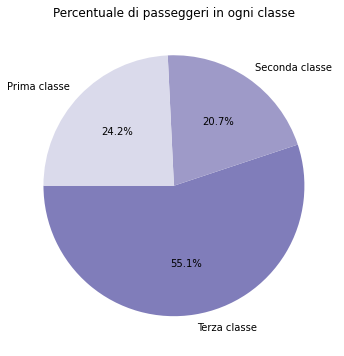

In [16]:
plt.figure(figsize= (8,6))
sizes= [491, 184, 216]
labels= ['Terza classe', 'Seconda classe','Prima classe']
colors= ['#807dba', '#9e9ac8', '#dadaeb']

plt.title("Percentuale di passeggeri in ogni classe")
plt.pie (sizes, labels=labels, autopct='%1.1f%%', colors= colors, startangle= 180)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})

plt.show()

In [20]:
print("Media appartenenza alle classi: ", df['Pclass'].mean()) 
print("Mediana delle classi: ", df['Pclass'].median())
print("Deviazione standard classi: ", np.std(df['Pclass']))

Media appartenenza alle classi:  2.308641975308642
Mediana delle classi:  3.0
Deviazione standard classi:  0.8356019334795189


## <p><span style="color:#fd8d3c"> 3. Genere </span></p> 

A bordo della nave sono presenti 577 maschi e 314 femmine. Oltre a questi sono presenti anche familiari e coniugi ma non ne sappiamo il sesso

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

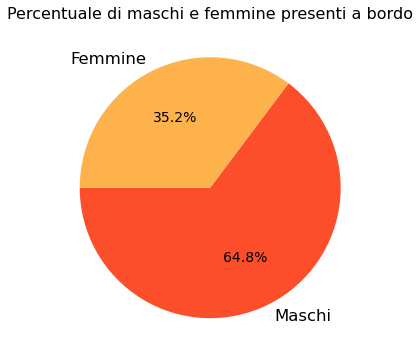

In [22]:
plt.figure(figsize= (8,6))
sizes= [577, 314]
labels= ['Maschi', 'Femmine']
colors= ['#fc4e2a', '#feb24c']

sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})
plt.pie (sizes, labels=labels, autopct='%1.1f%%', colors= colors, startangle= 180)
plt.title("Percentuale di maschi e femmine presenti a bordo")
plt.show()

## <p><span style="color:#fd8d3c"> 4. Età </span></p> 

Sulla nave sono presenti persone di tutte le età.

L'età minima calcolata nel range è 0, l'età media è intorno ai 28 anni e l'età massima poco sopra i 60. Si può vedere che osno presenti degli outliers che arrivano ad un massimo di 80 anni.

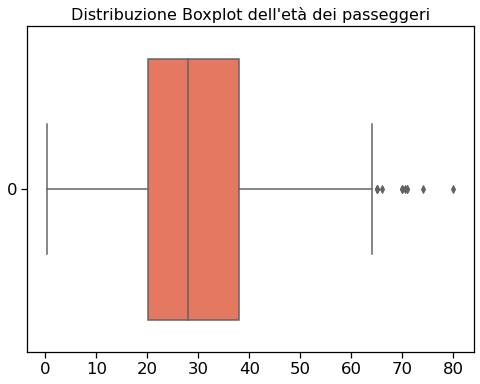

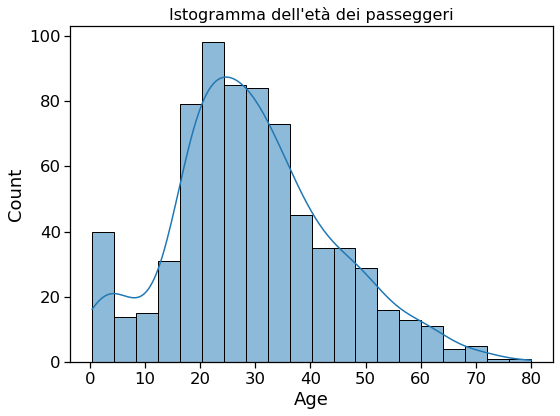

In [30]:
plt.figure(figsize= (8,6))


sns.boxplot(data = df['Age'], orient = "h", color ="#fb6a4a")
plt.title ("Distribuzione Boxplot dell'età dei passeggeri")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16})


plt.figure(figsize= (8,6))
sns.histplot(df['Age'], kde= True)
plt.title ("Istogramma dell'età dei passeggeri")

plt.tight_layout()
plt.show()

A bordo della nave sono presenti 139 minori di 18 anni. Attraverso il calcolo del range è possibile notare come l'età minima sia 0 mentre la massima 18. In media i passeggeri minorenni hanno dai 4 ai 17 anni, con un numero più elevato intorno ai 13.

In [33]:
minori = df['Age']<=18.0
minori.value_counts()

False    752
True     139
Name: Age, dtype: int64

Text(0.5, 1.0, 'Minori a bordo')

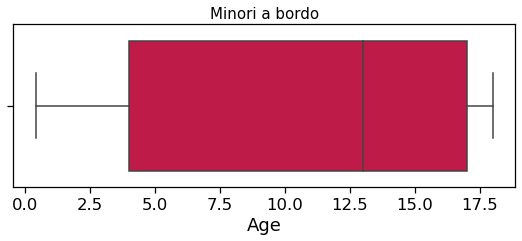

In [34]:
fig = plt.subplots(figsize = (9,3))
sns.boxplot(x = df[df['Age'] <=18.0]['Age'],color = '#d9003d')
plt.title('Minori a bordo', fontsize=15)

## <p><span style="color:#fd8d3c"> 5. Familiari </span></p> 

A bordo della nave sono presenti persone accompagnate da fratelli/ coniugni o genitori/figli

In [21]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## <p><span style="color:#fd8d3c"> 6. Costo del biglietto </span></p> 

In media il costo del biglietto è di 32.2042, però attraverso la deviazione standard, che è molto elevata, scopriamo che questo valore non è rappresentativo. Infatti, possiamo vedere che la mediana è molto inferiore

In [35]:
print("Prezzo medio del biglietto: ", df['Fare'].mean())
print("Mediana prezzo del biglietto: ", df['Fare'].median())
print("Deviazione standard prezzo biglietto: ", np.std(df['Fare']))

Prezzo medio del biglietto:  32.2042079685746
Mediana prezzo del biglietto:  14.4542
Deviazione standard prezzo biglietto:  49.66553444477411


LA maggior parte delle persone ha acquistato un biglietto nella fascia di prezzo che va da 0 a 13.0000. Contrariamente la fascia meno acquistata è quella che va dai 17.0000 ai 20.0000. 

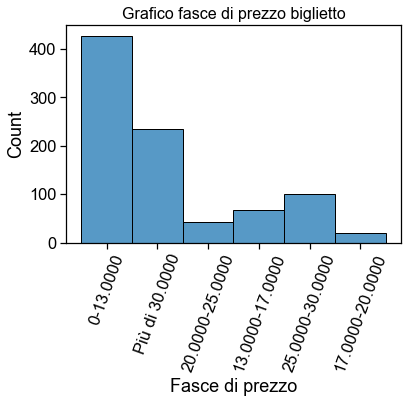

In [27]:
fasce_prezzo=[]
for c in df.Fare:
    if c<13.0001:
        fasce_prezzo.append("0-13.0000")
    elif 13.0000<c<17.0001:
        fasce_prezzo.append("13.0000-17.0000")
    elif 17.0000<c<20.0001:
        fasce_prezzo.append("17.0000-20.0000")
    elif 20.0000<c<25.0001:
        fasce_prezzo.append("20.0000-25.0000")
    elif 25.0000<c<30.0001:
        fasce_prezzo.append("25.0000-30.0000")
    else:
        fasce_prezzo.append("Più di 30.0000")
        
df['fasce_prezzo']=fasce_prezzo
        

sns.histplot(df["fasce_prezzo"])
sns.set_style("darkgrid")
plt.rcParams ["figure.figsize"] = [8,6]

plt.title("Grafico fasce di prezzo biglietto")

plt.xlabel("Fasce di prezzo")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})

plt.xticks(rotation=70)
plt.show()

## <p><span style="color:#fd8d3c"> 7. Cabine </span></p> 

Non tutti i passeggeri hanno una cabina assegnata, o almeno il dato non è presente nella tabella

In [28]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

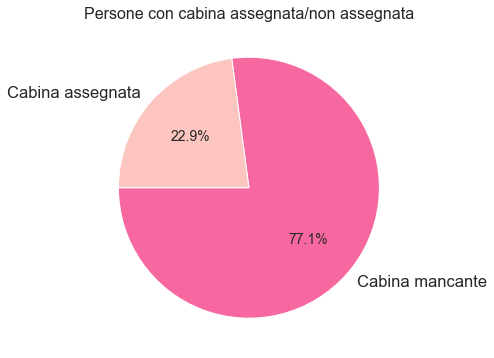

In [29]:
plt.figure(figsize=(8,6))

sizes= [687,204]
labels= ['Cabina mancante', 'Cabina assegnata']
colors= ['#f768a1', '#fcc5c0']

plt.pie (sizes, labels=labels, autopct='%1.1f%%', colors= colors, startangle= 180)
plt.title ("Persone con cabina assegnata/non assegnata")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})
plt.show()

## <p><span style="color:#fd8d3c"> 8. Imbarchi </span></p> 

Sono stati tre i porti da cui si sono imbarcati i passeggeri:
1. Southampton
2. Cherbourg
3. Queenstown


In [30]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

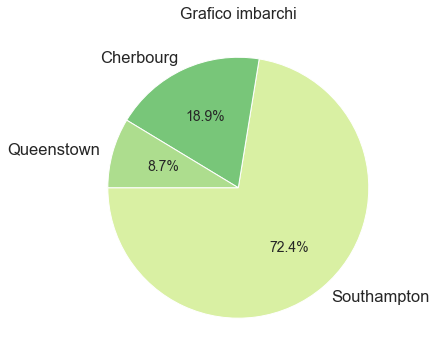

In [31]:
plt.figure(figsize=(8,6))

sizes= [644, 168, 77]
labels= ['Southampton', 'Cherbourg', 'Queenstown']
colors= ['#d9f0a3', '#78c679', '#addd8e']

plt.pie (sizes, labels=labels, autopct='%1.1f%%', colors= colors, startangle= 180)
plt.title("Grafico imbarchi")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})
plt.show()

# <p style="text-align: center;"><span style="color:#0570b0"> Statistiche descrittive </span></p> 

## <p><span style="color:#74a9cf"> 1. Dati relativi ai passeggeri maschi e femmine </span></p> 

In [32]:
print ("Tabella di dati relativi ai maschi e alle femine, suddivisi per classe")
tabella_classe_sesso = pd.pivot_table(df,index=['Sex','Pclass'])
tabella_classe_sesso

Tabella di dati relativi ai maschi e alle femine, suddivisi per classe


Age        Fare     Parch  PassengerId     SibSp  \
Sex    Pclass                                                           
female 1       34.611765  106.125798  0.457447   469.212766  0.553191   
       2       28.722973   21.970121  0.605263   443.105263  0.486842   
       3       21.750000   16.118810  0.798611   399.729167  0.895833   
male   1       41.281386   67.226127  0.278689   455.729508  0.311475   
       2       30.740707   19.741782  0.222222   447.962963  0.342593   
       3       26.507589   12.661633  0.224784   455.515850  0.498559   

               Survived     soli1     soli2  
Sex    Pclass                                
female 1       0.968085  0.478723  0.319149  
       2       0.921053  0.421053  0.407895  
       3       0.500000  0.437500  0.409722  
male   1       0.368852  0.278689  0.188525  
       2       0.157407  0.296296  0.175926  
       3       0.135447  0.221902  0.146974

## <p><span style="color:#74a9cf"> 2. Passeggeri sopravvissuti </span></p> 

Al disastro sono sopravvissute 342, non contando gli accompagnatori

In [33]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
print("Sopravvivenza media", df['Survived'].mean())

Sopravvivenza media 0.3838383838383838


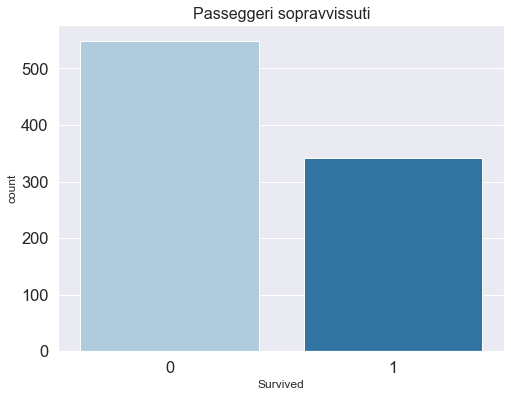

In [106]:
plt.figure(figsize=(8,6))
plt.title ("Passeggeri sopravvissuti")

sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16})
sns.set_palette('Paired')
sns.countplot(x='Survived',data=df)
plt.savefig ('img1.png')
plt.show()

## <p><span style="color:#74a9cf"> 3. Divisione passeggeri per classe/sesso </span></p> 

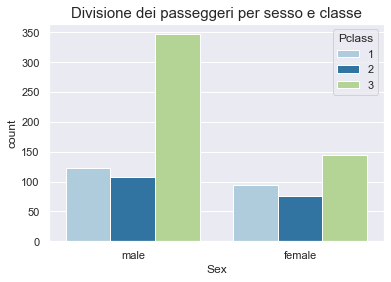

In [107]:
sns.set_theme(style="darkgrid")

sns.set_palette('Paired')
plt.figure(figsize=(6,4))
sns.countplot(x="Sex",hue ='Pclass',data=df)
plt.title('Divisione dei passeggeri per sesso e classe', fontsize =15)
plt.savefig ('img2.png')

plt.show()

## <p><span style="color:#74a9cf"> 4. Passeggeri sopravvissuti per sesso </span></p> 

Dai grafici è possibile notare come al disastro siano sopravvissuti più passeggeri di genere femminile che maschile.


In [38]:
female_survivor = np.round((len(df[(df['Sex']=='female') & (df['Survived']==1)])/len(df[df['Sex']=='female']))*100,2)
male_survivor = np.round((len(df[(df['Sex']=='male') & (df['Survived']==1)])/len(df[df['Sex']=='male']))*100,2)

print(f'{female_survivor}% di femmine sopravvissute sulla nave')
print(f'{male_survivor}% di maschi sopravvissuti sulla nave')

74.2% di femmine sopravvissute sulla nave
18.89% di maschi sopravvissuti sulla nave


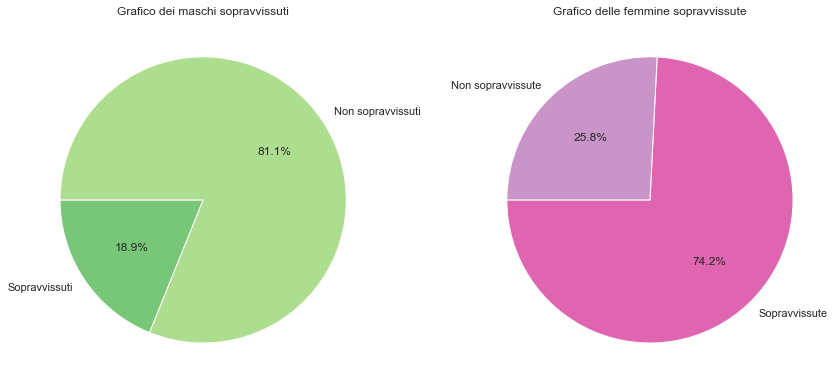

In [39]:
plt.rcParams ["figure.figsize"] = [12,8]
sizes_maschi= (18.89, 81.11)
labels_maschi= ("Sopravvissuti", "Non sopravvissuti")

sizes_donne= (74.2, 25.8)
labels_donne= ("Sopravvissute", "Non sopravvissute")

color1= ("#df65b0", "#c994c7")
color2= ("#78c678", "#addd8e")

plt.subplot(1,2,1)
plt.pie(sizes_maschi, labels= labels_maschi, colors= color2, autopct= '%1.1f%%', startangle= 180)
plt.title ('Grafico dei maschi sopravvissuti')
plt.subplot(1,2,2)
plt.pie(sizes_donne, labels= labels_donne, colors= color1, autopct= '%1.1f%%', startangle= 180)
plt.title ('Grafico delle femmine sopravvissute')


plt.tight_layout()
plt.show()

## <p><span style="color:#74a9cf"> 5. Passeggeri sopravvissuti per classe </span></p> 

In [40]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119



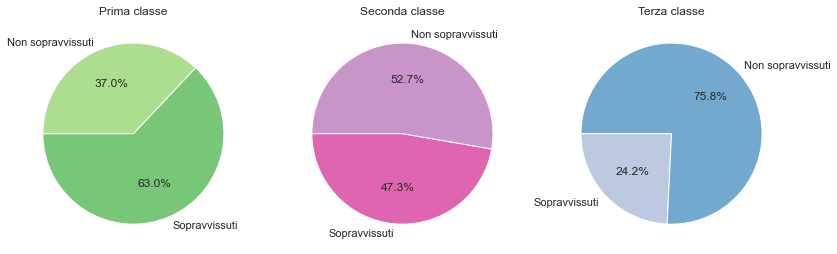

In [41]:
plt.rcParams ["figure.figsize"] = [12,8]
sizes_prima= (136, 80)
labels_prima= ("Sopravvissuti", "Non sopravvissuti")

sizes_seconda= (87, 97)
labels_seconda= ("Sopravvissuti", "Non sopravvissuti")

sizes_terza= (119, 372)
labels_terza= ("Sopravvissuti", "Non sopravvissuti")

color1= ("#df65b0", "#c994c7")
color2= ("#78c678", "#addd8e")
color3= ('#bdc9e1', '#74a9cf')

plt.subplot(1,3,1)
plt.pie(sizes_prima, labels= labels_prima, colors= color2, autopct= '%1.1f%%', startangle= 180)
plt.title("Prima classe")
plt.subplot(1,3,2)
plt.pie(sizes_seconda, labels= labels_seconda, colors= color1, autopct= '%1.1f%%', startangle= 180)
plt.title("Seconda classe")
plt.subplot(1,3,3)
plt.pie(sizes_terza, labels= labels_terza, colors= color3, autopct= '%1.1f%%', startangle= 180)
plt.title("Terza classe")

plt.tight_layout()
plt.show()

## <p><span style="color:#74a9cf"> 6. Passeggeri sopravvissuti per classe/sesso </span></p> 

Dal grafico possiamo concludere che per tutte e tre le classi sociali, la maggior parte delle donne sono sopravvissute (anche se sono presenti alcune eccezioni). Contrariamente, la maggior parte degli uomini della seconda e terza classe non sono sopravvissuti.

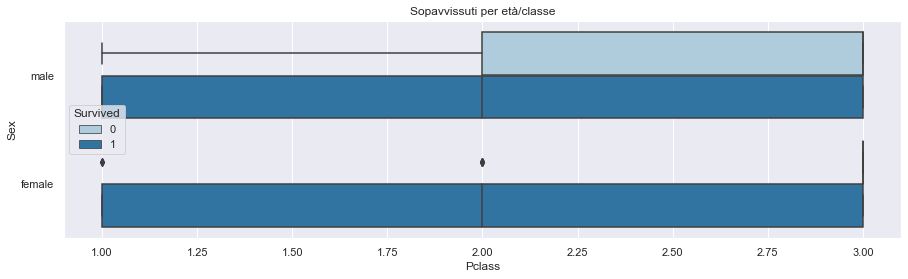

In [42]:
plt.figure(figsize=(15, 4))
sns.boxplot(y="Sex", x="Pclass",hue="Survived",data=df, orient="h")
plt.title('Sopavvissuti per età/classe')

plt.show()

## <p><span style="color:#74a9cf"> 7. Passeggeri sopravvissuti per età </span></p> 

La fascia con maggior tasso di sopravvivenza è quella dei bambini, mentre quelle con maggiori perdite è quella relativa ai ragazzi (21-30)

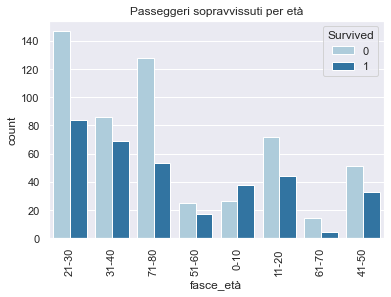

In [108]:
fasce_età=[]
for c in df.Age:
    if c<11:
        fasce_età.append("0-10")
    elif 10<c<21:
        fasce_età.append("11-20")
    elif 20<c<31:
        fasce_età.append("21-30")
    elif 30<c<41:
        fasce_età.append("31-40")
    elif 40<c<51:
        fasce_età.append("41-50")
    elif 50<c<61:
        fasce_età.append("51-60")
    elif 60<c<71:
        fasce_età.append("61-70")
    else:
        fasce_età.append("71-80")      
 
df['fasce_età']=fasce_età

plt.figure(figsize=(6,4))
sns.set_palette('Paired')
sns.countplot(data=df, x='fasce_età', hue="Survived")
plt.xticks(rotation=90)
plt.title ("Passeggeri sopravvissuti per età")

plt.savefig ('img3.png')
plt.show()

## <p><span style="color:#74a9cf"> 8. Età dei passeggeri per classe e per genere </span></p> 

Dal grafico possiamo vedere che in prima classe l'età dei passeggeri si concentra nella fascia 30-50, con un minimo molto vicino allo 0 e un massimo che arriva ad 80. 
In seconda classe invece, l'età si concentra tra i 25-35 anni, con un massimo poco superiore ai 50 ed un minimo intorno ai 5. In questa classe sono presenti motlo outliers che arrivano a 0 e 70. 
In fine la terza classe ha una concentrazione intorno ai 18-32, con un minimo di 0 e un massimo leggermente sopra i 50. Anche in questo caso sono presenti degli outliers che suoperano i 70. Possiamo dunque concludere che la prima classe è composta da passeggeri più adulti, contrariamente alla terza in cui sono presenti persone più giovani.

Per quanto riguarda l'età ed il genere, la differenza è minima:

1. Maschi = 20-40 con un minimo di 0 e un massimo intorno ai 65. Sono presenti degli outliers che arrivano fino ad 80

2. Femmine = 18-37 con un minimo di 0 e un massimo intorno ai 60. In questo caso non sono presenti degli outliers.


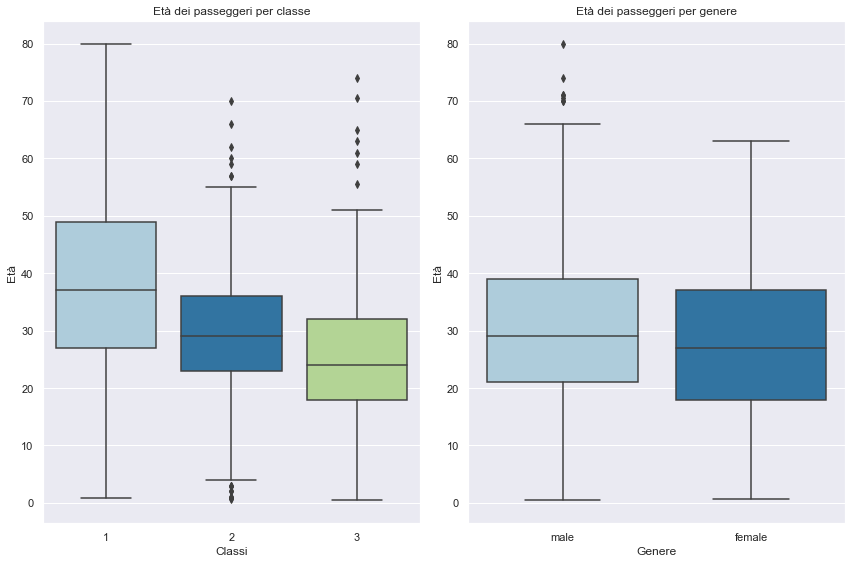

In [109]:
plt.rcParams ["figure.figsize"] = [12,8]

plt.subplot(1,2,1)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.xlabel("Classi")
plt.ylabel("Età")
plt.title("Età dei passeggeri per classe")

plt.subplot(1,2,2)
sns.boxplot(x='Sex', data=df, y='Age', orient = "v")
plt.xlabel("Genere")
plt.ylabel("Età")
plt.title("Età dei passeggeri per genere")

plt.savefig ('img4.png')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribuzione dei passeggeri per sesso/età')

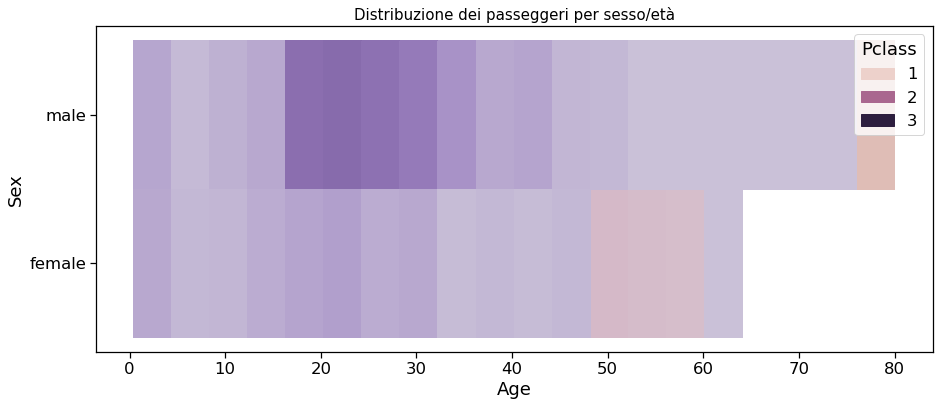

In [38]:
fig = plt.subplots(figsize = (15,6))
sns.histplot(x="Age", y ="Sex" ,kde = True, hue = 'Pclass',data=df)
plt.title('Distribuzione dei passeggeri per sesso/età', fontsize=15)

## <p><span style="color:#74a9cf"> 9. Sopravvissuti per classe/età </span></p> 

Dal grafico è possibile constatare che:
1. In prima classe sono mediamente deceduti passeggeri in un età compresa tra i 30-55 anni e sono sopravvissuti quelli tra i 25-45
2. In seconda classe sono deceduti passeggeri tra i 25-40 anni, mentre sono sopravvissuti quelli tra i 18-35
3. In terza classe sono deceduti i passeggeri tra i 20-35 anni, mentre i pochi sopravvissuti erano tra 15-28

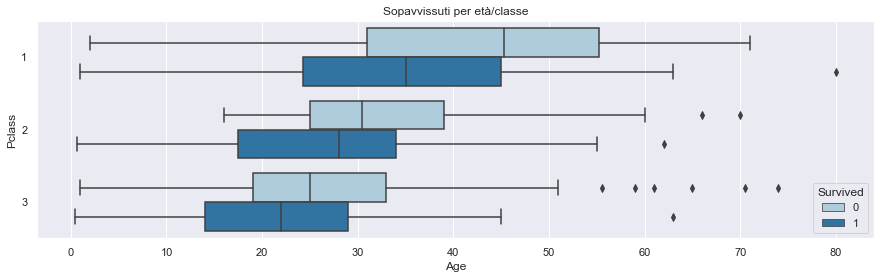

In [110]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="Age", y="Pclass",hue="Survived",data=df, orient="h")
plt.title('Sopavvissuti per età/classe')
plt.savefig ('img5.png')

plt.show()

## <p><span style="color:#74a9cf"> 10. Età mancante </span></p> 

Nella tabella non tutti i passeggeri hanno un età conosciuta. Infatti sono presenti 177 casi in cui non sappiamo l'età del passeggero

In [47]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [48]:
df[(df['Age'].isnull()) & df['Survived'] == 1]
print(f"Persone con età mancante sopravvissute {len(df[(df['Age'].isnull()) & df['Survived'] == 1])}")


df[(df['Age'].isnull()) & df['Survived'] == 0]
print(f"Persone con età mancante non sopravvissute {len(df[(df['Age'].isnull()) & (df['Survived'] == 0)])}")

Persone con età mancante sopravvissute 52
Persone con età mancante non sopravvissute 125


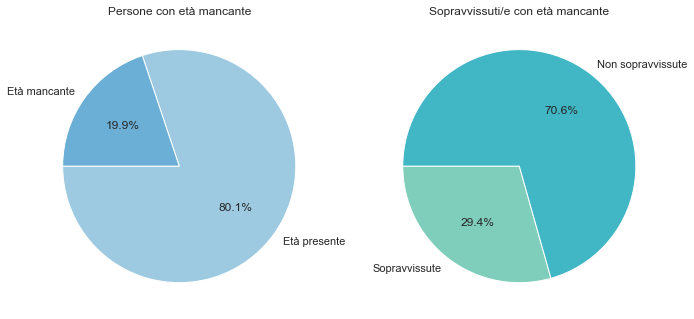

In [49]:
plt.rcParams ["figure.figsize"] = [10,6]
sizes_1= (714, 177)
labels_1= ("Età presente", "Età mancante")

sizes_2= (52,125)
labels_2= ("Sopravvissute", "Non sopravvissute")

color1= ("#7fcdbb", "#41b6c4")
color2= ("#9ecae1", "#6baed6")

plt.subplot(1,2,1)
plt.pie(sizes_1, labels= labels_1, colors= color2, autopct= '%1.1f%%', startangle= 180)
plt.title ('Persone con età mancante')
plt.subplot(1,2,2)
plt.pie(sizes_2, labels= labels_2, colors= color1, autopct= '%1.1f%%', startangle= 180)
plt.title ('Sopravvissuti/e con età mancante')

plt.tight_layout()
plt.show()

## <p><span style="color:#74a9cf"> 11. Sopravvissuti per imbarco</span></p> 

Dal grafico notiamo che a QueensTown si sono imbarcati pochi passeggeri, principalmente della terza classe, con qualche outliers relativo alla seconda e alla prima, a Southampton si sono imbarcati principlmente passeggeri della terza classe, con un numero notevolmente più alto di passeggeri della seconda e prima classe, in quanto il massimo relativo al range arriva priprio alla prima classe. In fine notiamo che al porto di Cherbourg si sono imbarcati il maggior numero di passeggeri appartenenti a tutte e tre le classi. Possiamo vedere che il maggior numero di passeggeri sopravvissuti sono quelli imbarcati a Cherbourg, mentre il minor numero a Southamtpon

In [50]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


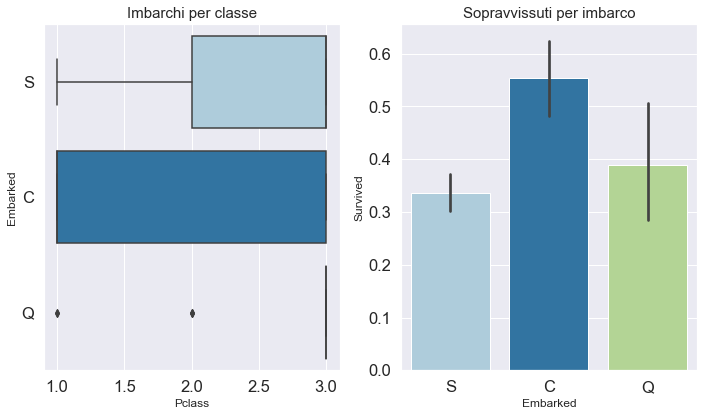

In [45]:
plt.rcParams ["figure.figsize"] = [10,6]

plt.subplot(1,2,1)
sns.set_palette('Paired')
sns.boxplot(x="Pclass",y = 'Embarked',data=df, orient="h")
plt.title('Imbarchi per classe', fontsize =15)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})

plt.subplot(1,2,2)
sns.set_palette('Paired')
sns.barplot(x="Embarked",y = 'Survived',data=df,)
plt.title('Sopravvissuti per imbarco', fontsize =15)
sns.set_context("notebook", font_scale=1.5, rc={"font.size":14, "axes.titlesize": 16,"axes.labelsize":12})

plt.tight_layout()
plt.show()

## <p><span style="color:#74a9cf"> 12. Persone accompagnate </span></p> 

In totale possiamo vedere che a bordo della nave sono presenti 466 fratelli/coniugi e 340 genitori/figli. Quindi in totale a bordo della nave sono presenti  1697 passeggeri

In [46]:
c= sum(df['SibSp'])
print ('Fratelli/coniugi a bordo della nave:', c)

f= sum(df['Parch'])
print ('Genitori/figli a bordo della nave:', f)

s = (891 + 466 + 340)
print ('Passeggeri a bordo della nave:', s)

Fratelli/coniugi a bordo della nave: 466
Genitori/figli a bordo della nave: 340
Passeggeri a bordo della nave: 1697


Per quanto riguarda i fratelli/coniugi, possiamo vedere che la terza classe è quella caratterizata dal maggior numero di accompagnatori, soprattutto per quanto riguarda gli uomini. Contrariamente la seconda classe è quella con il minor numero di accompagnatori (37 per gli uomini e 37 per le donne). La prima classe sono le donne ad avere un maggior numero di accompagnatori.

In totale:
1. Prima classe = 90 accompagnatori
2. Seconda classe = 74 accompagnatori
3. Terza classe = 302 accompagnatori


In [48]:
df2=df.loc[df['Sex'].isin(['male','female'])]

In [49]:
Summary = pd.crosstab(df2['Sex'], df2['Pclass'], values = df2['SibSp'], aggfunc=np.sum)
Summary

Pclass,1,2,3
Sex,,,
female,52,37,129
male,38,37,173


Per quanto riguarda i figli/genitori, possiamo vedere che la terza classe è quella caratterizata dal maggior numero di accompagnatori. Contrariamente la seconda classe è quella con il minor numero di accompagnatori. In tutte e tre le classi sono le donne ad avere il numero più alto di accompagnatori
In totale:
1. Prima classe = 77 accompagnatori
2. Seconda classe = 68 accompagnatori
3. Terza classe = 193 accompagnatori

In [50]:
Summary = pd.crosstab(df2['Sex'], df2['Pclass'], values = df2['Parch'], aggfunc=np.sum)
Summary

Pclass,1,2,3
Sex,,,
female,43,46,115
male,34,24,78


Dal grafico possiamo vedere che il numero di persone accompagnate è più alto in terza classe, sia che si tratti di fratelli/coniugi che si tratti di figli/genitori

1. Per quanto riguarda gli accompagnatori fratelli/coniugi possiamo vedere che in seconda classe sono di meno.
2. Per quanto riguarda i genitori/figli, questi sono in numero minore in prima classe.

Possiamo dunque concludere che le persone che viaggiano in terza classe sono quelle con un maggior numero di famigliari al seguito, contrariamente le altre due classi contengono un numero minore di accompagnatori, in particolar modo di figli/genitori

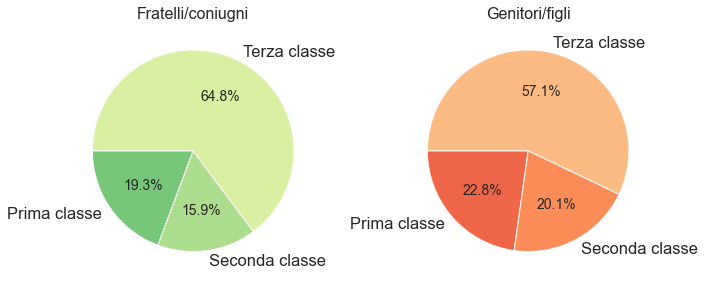

In [51]:
plt.rcParams ["figure.figsize"] = [10,6]
sizes_1= (90, 74,302)
labels_1= ("Prima classe", "Seconda classe", "Terza classe")

sizes_2= (77,68,193)
labels_2= ("Prima classe", "Seconda classe", "Terza classe")

color1= ("#ef6548", "#fc8d59", "#fdbb84")
color2= ("#78c679", "#addd8e", "#d9f0a3")

plt.subplot(1,2,1)
plt.pie(sizes_1, labels= labels_1, colors= color2, autopct= '%1.1f%%', startangle= 180)
plt.title ('Fratelli/coniugni')
plt.subplot(1,2,2)
plt.pie(sizes_2, labels= labels_2, colors= color1, autopct= '%1.1f%%', startangle= 180)
plt.title ('Genitori/figli')

plt.tight_layout()
plt.show()

Genitori/figli = la classe con minor numero di accompagnatori è la 1, mentre la classe con numero più alto è la 3. Per tutte e tre le classi il numero più alto di accompagnatori è 1, mentre il numero più basso è 5. detto ciò non sono presenti dati relativi alla 1 e la 2 classe al di sopra dei 3 accompagnatori.


In [57]:
Summary = pd.crosstab(df2['SibSp'], df2['Pclass'], values = df2['Parch'], aggfunc=np.sum)
Summary

Pclass,1,2,3
SibSp,,,
0,37.0,24.0,52.0
1,30.0,39.0,68.0
2,4.0,7.0,7.0
3,6.0,0.0,15.0
4,NaN,NaN,27.0
5,NaN,NaN,10.0
8,NaN,NaN,14.0


Fratelli/coniugi = il numero più alto di accompagnatori è in 3 classe, mentre il numero più basso è la 1. Il maggior numero di accompaganotori è 2, specialmente in terza classe, mentre il numero più basso è 6. Detto ciò non sono presenti dati relativi alla prima e la seconda classe per quanto riguarda 5/6 accompagnatori e 3 accompagnatori per la prima classe e 4 per la seconda.

In [61]:
Summary = pd.crosstab(df2['Parch'], df2['Pclass'], values = df2['SibSp'], aggfunc=np.sum)
Summary

Pclass,1,2,3
Parch,,,
0,57.0,35.0,69.0
1,12.0,28.0,88.0
2,20.0,8.0,137.0
3,NaN,3.0,2.0
4,1.0,NaN,2.0
5,NaN,NaN,3.0
6,NaN,NaN,1.0


Dall'analisi è possibile notare come il minor numero di accompagnatori in generale sia quello della prima classe, mentre il numero più alto sia in terza. Allo stesso tempo anche il numero di passeggeri che viaggiano senza fratelli/coniugi o genitori/figli è più alto in terza classe e più basso in seconda. Quindi:
1. Maggior numero di passeggeri senza fratelli/coniugi o  genitori/figli= terza classe
2. Maggior numero di passeggeri accompagnati = terza classe
3. Minor numero di passeggeri senza fratelli/coniugi o  genitori/figli = seconda classe
4. Minor numero di passeggeri accompagnati = prima classe 
5. Numero più alto di persone completamente sole = prima classe 

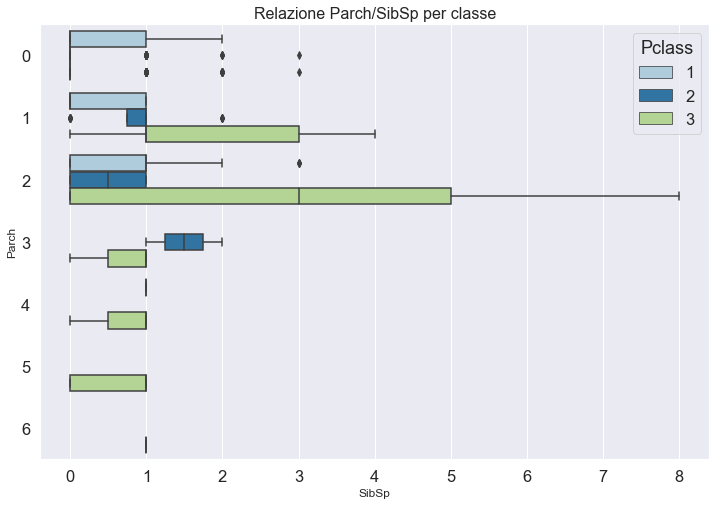

In [62]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="SibSp", y="Parch",hue="Pclass",data=df, orient="h")
plt.title('Relazione Parch/SibSp per classe')

plt.show()

## <p><span style="color:#74a9cf"> 13. Persone non accompagnate  </span></p> 

A bordo della nave ci sono 537 persone che viaggiano completamente sole

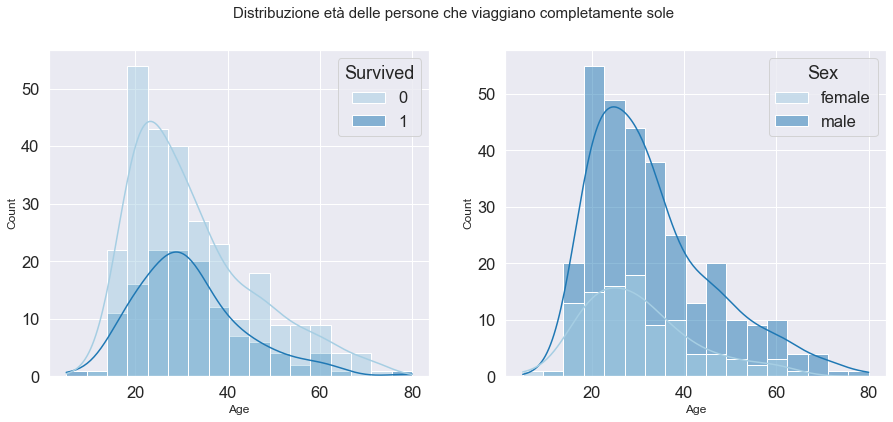

In [63]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=df[(df['Parch'] == 0) & (df['SibSp'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=df[(df['Parch'] == 0) & (df['SibSp'] == 0)],ax = ax[1])
fig.suptitle('Distribuzione età delle persone che viaggiano completamente sole', fontsize=15)
plt.show()

## <p><span style="color:#74a9cf"> 14. Persone accompagnate sopravvissute </span></p> 

- Fratelli/coniugi = massimo 8 per persona
- Genitori/figli = massimo 6 per persona

Possiamo vedere che i passeggeri con maggiori probabilità di sopravvivenza sono quelli con un solo accompagnatore (che sia fratello/coniuge oppure figlio/genitore).

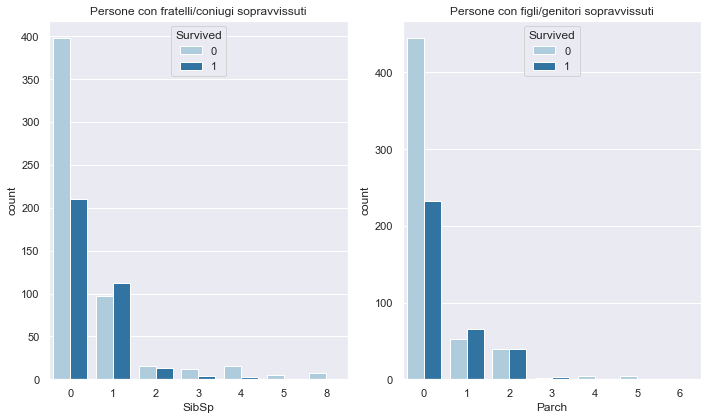

In [111]:
plt.figure(figsize=(10,6))
           
sns.set_palette('Paired')
plt.subplot(1,2,1)
sns.countplot(x='SibSp',data=df, hue="Survived")
plt.title ("Persone con fratelli/coniugi sopravvissuti")

plt.subplot(1,2,2)
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title ("Persone con figli/genitori sopravvissuti")
plt.savefig ('img6.png')

plt.tight_layout()
plt.show()

## <p><span style="color:#74a9cf"> 15. Rapporto classe/biglietto </span></p> 

Ho suddiviso il costo dei biglietti in 6 fasce di prezzo:

1. Più di 30.0000
2. 25.0000-30.0000
3. 20.0000-25.0000
4. 17.0000-20.0000
5. 13.0000-17.0000
6. 0-13.0000

E analizzando la tabella è possibile notare come la maggior parte dei passeggeri di prima classe abbia pagato un biglietto nella prima fascia di prezzo (Più di 30.0000), mentre i passeggeri della terza classe rientravano nella 6 fascia. Detto ciò è possibile notare che alcuni passeggeri della terza classe sono arrivati ad acquistare un biglietto anche nella 5,4 e 3 fascia di prezzo. I passeggeri di seconda classe invece erano mediamente concentrati nella 1 e 2 fascia

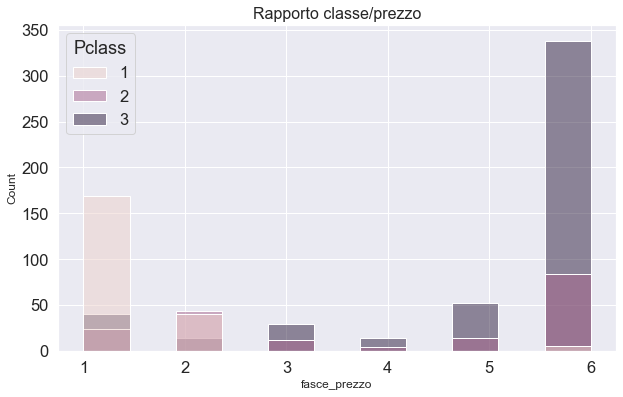

In [105]:
fasce_prezzo=[]
for c in df.Fare:
    if c<13.0001:
        fasce_prezzo.append(6)
    elif 13.0000<c<17.0001:
        fasce_prezzo.append(5)
    elif 17.0000<c<20.0001:
        fasce_prezzo.append(4)
    elif 20.0000<c<25.0001:
        fasce_prezzo.append(3)
    elif 25.0000<c<30.0001:
        fasce_prezzo.append(2)
    else:
        fasce_prezzo.append(1)
        
df['fasce_prezzo']=fasce_prezzo
        
plt.figure(figsize=(10,6))
           
sns.set_palette('Paired')
sns.histplot(x='fasce_prezzo',data=df, hue="Pclass")
plt.title("Rapporto classe/prezzo")
plt.savefig ('img7.png')

plt.show()

Per tutte e tre le classi, le donne hanno pagato una tariffa minore rispetto agli uomini. 

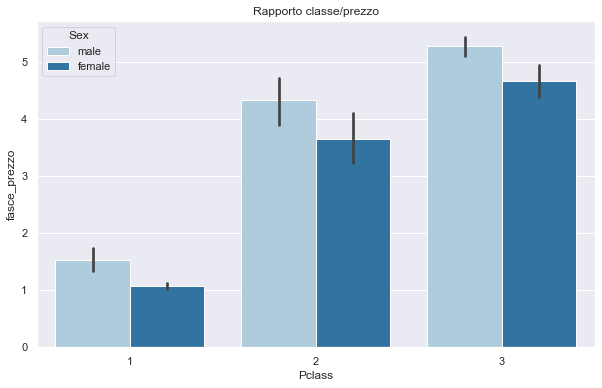

In [112]:
plt.figure(figsize=(10,6))
           
sns.set_palette('Paired')
sns.barplot(x='Pclass', y= "fasce_prezzo",data=df, hue="Sex")
plt.title("Rapporto classe/prezzo")
plt.savefig ('img8.png')

plt.show()

#### <p><span style="color:#74a9cf"> Prima classe </span></p> 

La deviazione standard è molto alta quindi questo ci dice che la media non è molto rappresentativa. Infatti possiamo vedere che tra la media e la mediana c'è una netta differenza.

In [58]:
print ("Media prezzo del biglietto in prima classe: ", df[df['Pclass']==1]['Fare'].mean())
print ("Mediana prezzo del biglietto in prima classe: ", df[df['Pclass']==1]['Fare'].median())
print("Deviazione standard prima classe: ", np.std(df[df['Pclass']==1]['Fare']))

Media prezzo del biglietto in prima classe:  84.15468749999992
Mediana prezzo del biglietto in prima classe:  60.287499999999994
Deviazione standard prima classe:  78.19872611599817


#### <p><span style="color:#74a9cf"> Seconda classe </span></p> 

Anche in questo caso la deviazione standard è molto alta rispetto al valore medio, dunque questo non è rappresentativo 

In [59]:
print ("Media prezzo del biglietto in seconda classe: ", df[df['Pclass']==2]['Fare'].mean())
print ("Mediana prezzo del biglietto in seconda classe: ", df[df['Pclass']==2]['Fare'].median())
print("Deviazione standard seconda classe: ", np.std(df[df['Pclass']==2]['Fare']))

Media prezzo del biglietto in seconda classe:  20.66218315217391
Mediana prezzo del biglietto in seconda classe:  14.25
Deviazione standard seconda classe:  13.380888759886025


#### <p><span style="color:#74a9cf"> Terza classe </span></p> 

Anche in questo caso la deviazione standard è molto alta rispetto al valore medio, dunque questo non è rappresentativo 

In [60]:
print ("Media prezzo del biglietto in terza classe: ", df[df['Pclass']==3]['Fare'].mean())
print ("Mediana prezzo del biglietto in terza classe: ", df[df['Pclass']==3]['Fare'].median())
print("Deviazione standard terza classe: ", np.std(df[df['Pclass']==3]['Fare']))

Media prezzo del biglietto in terza classe:  13.675550101832997
Mediana prezzo del biglietto in terza classe:  8.05
Deviazione standard terza classe:  11.766141556896185


## <p><span style="color:#74a9cf"> 16. Titoli a bordo </span></p> 

In [76]:
def get_title(nome):
    return nome.split(',')[1].split('.')[0]

df['Title']=df['Name'].apply(get_title)

In [77]:
df.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Ms                1
 Mme               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Sir               1
 Don               1
 Lady              1
Name: Title, dtype: int64

## <p><span style="color:#74a9cf"> 17. Persone senza cabina sopravvissute </span></p> 

Le persone sopravvissute al disastro del Titanico sono 342.
- Le persone senza cabina sono 687, di queste ne sono sopravvisute 206.
- Le persone con cabina sopravvissute sono 136
Dunque sono sopravvissute più persone senza cabina rispetto a quelle con la cabina assegnata

In [78]:
df[(df['Cabin'].isnull()) & df['Survived'] == 1]
print(f"Persone senza cabina sopravvissute {len(df[(df['Cabin'].isnull()) & df['Survived'] == 1])}")


df[(df['Cabin'].isnull()) & df['Survived'] == 0]
print(f"Persone senza cambina non sopravvissute {len(df[(df['Cabin'].isnull()) & (df['Survived'] == 0)])}")

Persone senza cabina sopravvissute 206
Persone senza cambina non sopravvissute 481


# <p style="text-align: center;"><span style="color:#31a354"> Statistiche descrittive </span></p> 

## <p><span style="color:#74c476"> 1. Pairplot sopravvissuti classe/età per sesso  </span></p>

Sono sopravvissuti mediamente persone al di sotto dei 50 anni di età, anche se in prima classe ne sono sopravvissute anche di più anziane. La prima classe è quella con il maggior numero di sopravvissuti.

Il più alto numero di decessi è quello dei passeggeri di terza classe.

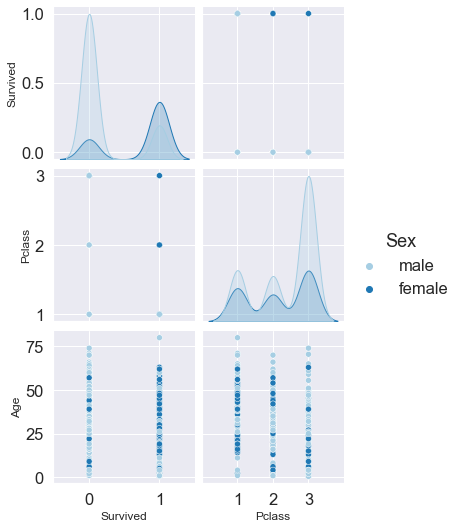

In [62]:
sns.pairplot(df,
             x_vars=["Survived", "Pclass"],
             y_vars=["Survived", "Pclass", "Age"], 
             hue="Sex")
plt.show()

## <p><span style="color:#74c476"> 2. Pairplot familiari ed età per classe </span></p>

1. La terza classe è quella con il maggior numero di figli/genitori, segue la prima classe e poi la seconda. da 0 a 2 figli/genitori è il numero più ampio di accompagnatori per passeggero (questo fino ai 70 anni di età), contrariamente da 3 a 6 familiari è in numero ridotto, specialmente per una fascia di età intermedia dai 20 ai 60.

2. Solo in terza classe sono presenti passeggeri che hanno più di 4 fratelli/coniugi e principalmente sono persone sotto i 25 anni di età. Detto ciò la maggior parte dei passeggeri non ha un fratello/coniuge ad accompagnarlo.

3. La persona più anziana a bordo viaggia da sola


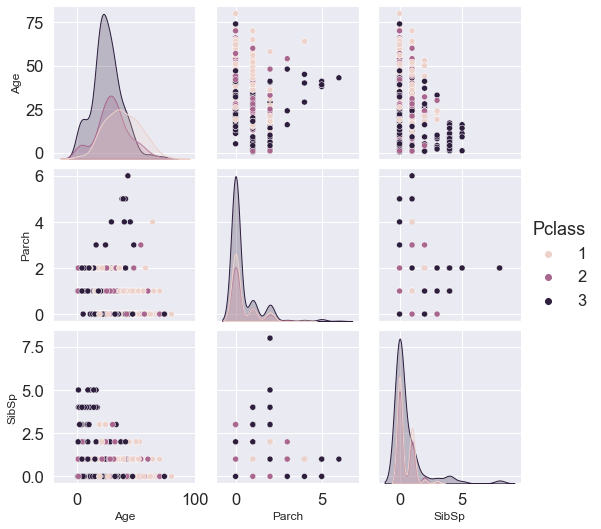

In [80]:
sns.pairplot(df,
             x_vars=["Age", "Parch", "SibSp"],
             y_vars=["Age", "Parch", "SibSp"], 
             hue="Pclass")
plt.show()

## <p><span style="color:#74c476"> 3. Scatterplot fasce di prezzo ed età </span></p>

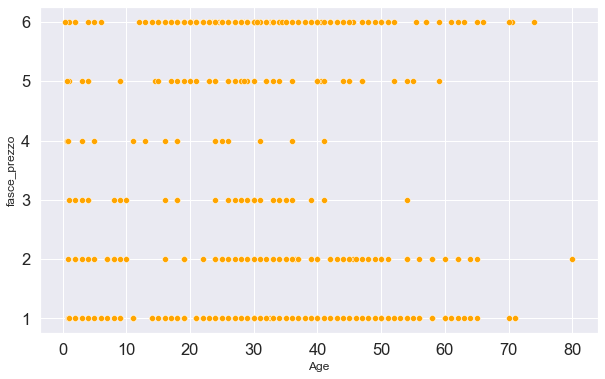

In [81]:
sns.scatterplot(x='Age',y='fasce_prezzo',data=df, color = 'orange')
plt.show()

## <p><span style="color:#74c476"> 4. Scatterplot Sibsp e Parch </span></p>

Possiamo vedere che il nucleo familiare più ampio è composto da 11 persone, il passeggero più 2 genitori/figli e 8 fratelli/coniugi. Allo stesso tempo sono presenti passeggeri che viaggiano completamente da soli

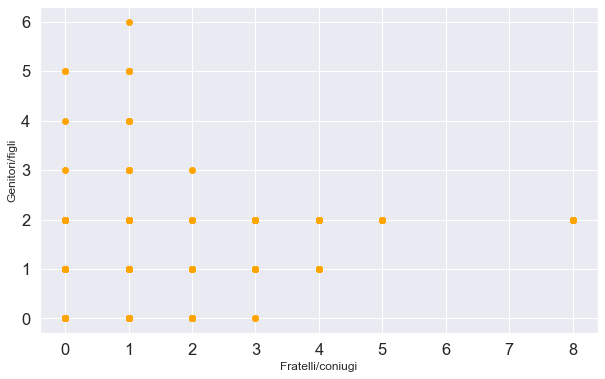

In [82]:
x = df["SibSp"]
y = df["Parch"]

plt.xlabel ("Fratelli/coniugi")
plt.ylabel ("Genitori/figli")

plt.plot(x,y, "o", color = "orange")
plt.show()

## <p><span style="color:#74c476"> 5. Sopravvissuti per sesso </span></p>

Dal grafico possiamo vedere che i sopravvissuti sono principalmente femmine, specialmente in seconda e terza classe. La prima classe vede un numero pù alto di sopravvissuti maschi.

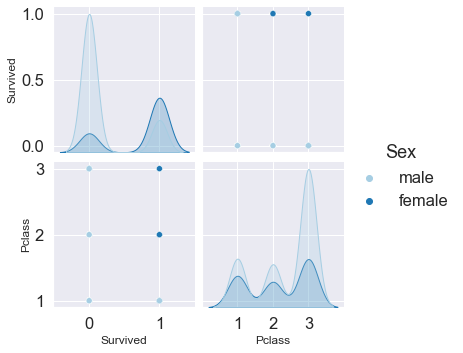

In [83]:
sns.pairplot(df,
             x_vars=["Survived", "Pclass"],
             y_vars=["Survived", "Pclass"], 
             hue="Sex")
plt.show()

## <p><span style="color:#74c476"> 6. Scatterplot età/classe </span></p>

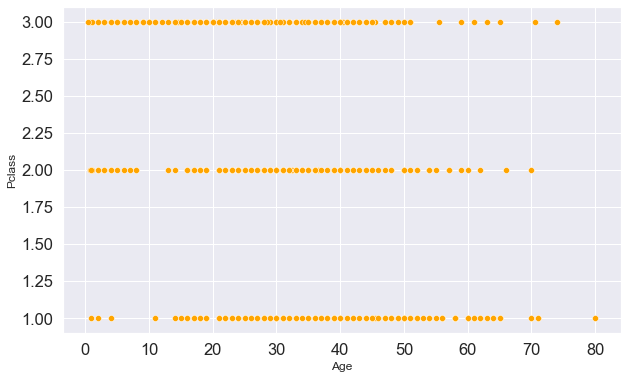

In [84]:
sns.scatterplot(x='Age',y='Pclass',data=df, color = 'orange')
plt.show()

## <p><span style="color:#74c476"> 7. Pairplot Sopravvissuti classe/genere per imbarco  </span></p>  

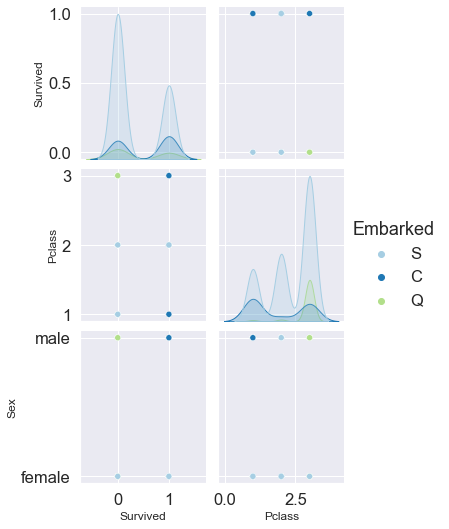

In [90]:
sns.pairplot(df,
             x_vars=["Survived", "Pclass"],
             y_vars=["Survived", "Pclass", "Sex"], 
             hue="Embarked")
plt.show()

## <p><span style="color:#74c476"> 8. Pairplot tariffa/classe per genere </span></p>

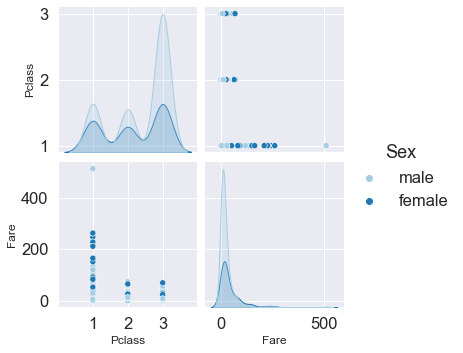

In [63]:
sns.pairplot(df,
             x_vars=["Pclass", "Fare"],
             y_vars=["Pclass", "Fare"], 
             hue="Sex")
plt.show()